# Car Price Prediction Model

### Analyzing features

+ **Name** - The brand and model of the car.
+ **Year** -  The year of the car's model.
+ **Selling Price** -  The selling price of the car (to be predicted).
+ **KM driven** - The distance travelled of the car in kilometers.
+ **Fuel** - The fuel type of the car.
+ **Seller Type** -  The type of seller of the car listing.
+ **Transmission** - The type of transition of the car.
+ **Owner** - The number of previous owners of the car.
+ **Mileage** - The fuel efficiency of the car.
+ **Engine** - The engine power of the car.
+ **Max Power** - The horsepower of the car sent to the wheels.
+ **Torque** - The force generated by the car's engine.
+ **Seats** - The number of seats in the car.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import ppscore as pps
from scipy import stats

### 1. Load data


In [2]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\ML\Cars.csv")

In [3]:
# Print DataFrame's structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
# Print the first five rows of dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Checking the null values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
# Check the statistical information of data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# 2. Exploratory Data Analysis

In [7]:
# Map 'First owner' to 1, ..., 'Test Drive Car' to 5

owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df['owner'] = df['owner'].map(owner_mapping)

In [8]:
# Filter out rows where fuel is 'CNG' or 'LPG'

df = df[~df['fuel'].isin(['CNG','LPG'])]

In [9]:
# Remove 'kmpl' and convert to float

df['mileage'] = df['mileage'].str.replace('kmpl', '').astype('float64')

In [10]:
# Remove 'CC' and convert to float

df['engine'] = df['engine'].str.replace('CC', '').astype('float64')

In [11]:
# Remove 'bhp' and convert to float

df['max_power'] = df['max_power'].str.replace('bhp','').astype('float64')

In [12]:
# Keep only the first word

df['name'] = df['name'].str.split(' ', expand=True)[0]
df = df.rename(columns={'name': 'brand'}) 

In [13]:
# Drop the 'torque' column

df = df.drop(columns = ['torque'])

In [14]:
# Remove rows where the car is a 'Test Drive Car'

df = df[df['owner'] !=5]
map={"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4}
df.replace({"owner":map},inplace=True)

In [15]:
# Print the first five rows of dataset
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [17]:
#EDA
#check columns name
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [18]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


### Univariate analysis
**Count Plot**

The "fuel", "transmission" and "seats" columns will be analyzed using count plot since the values of these columns contain only a few variations and count plot will clearly show the distribution of the values.

<Axes: xlabel='fuel', ylabel='count'>

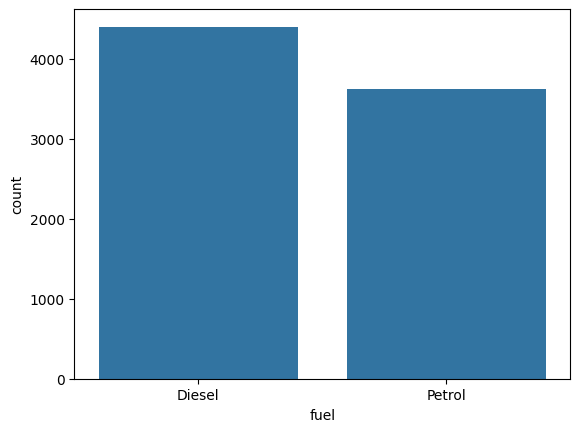

In [19]:
#Univerate analysis
#countplot

sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

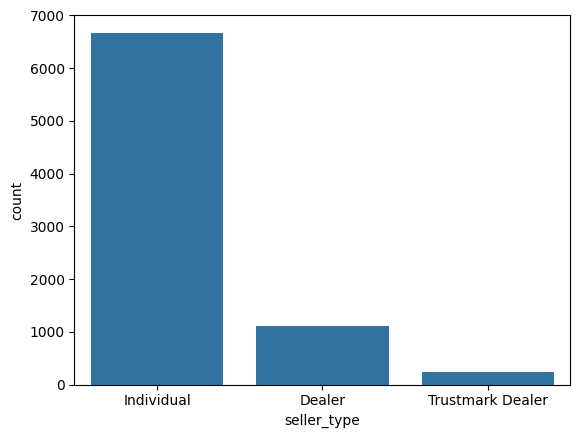

In [20]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='seats', ylabel='count'>

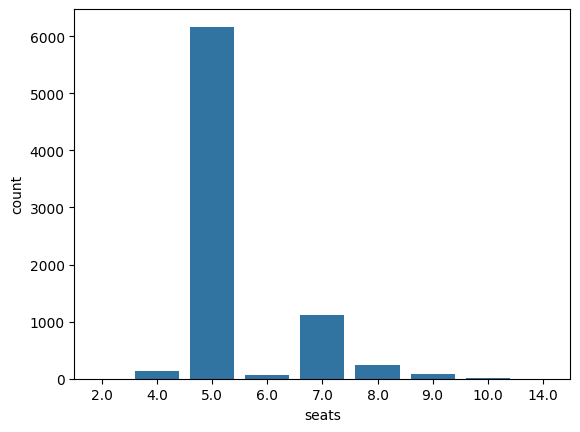

In [21]:
sns.countplot(data = df, x = 'seats')

# Distribution plot
The "year" column will be analyzed by using distribution plot to see its distribution.

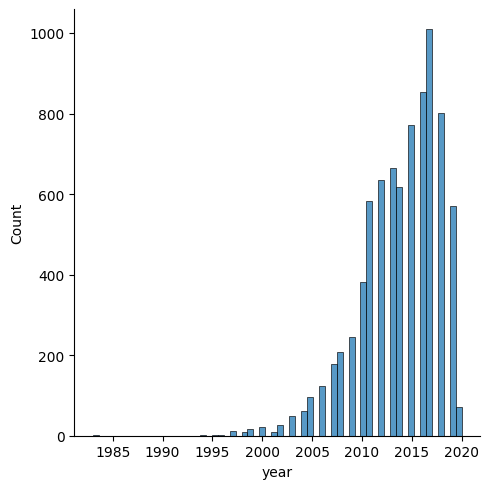

In [22]:
#distribution plot
sns.displot(data = df, x = 'year')

# Multivirate analysis
## Boxplot
The "fuel" and "seats" columns will be analyzed using box plot to check the outliers.

Text(0.5, 0, 'fuel')

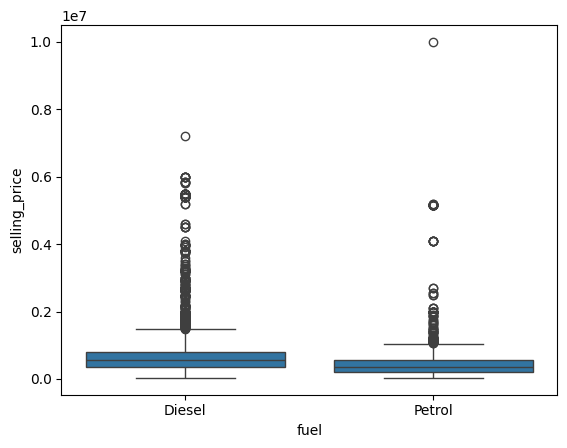

In [23]:
#Multivirate analysis
#boxplot

sns.boxplot(x = df['fuel'], y = df['selling_price'])
plt.ylabel("selling_price")
plt.xlabel("fuel")

Text(0.5, 0, 'seats')

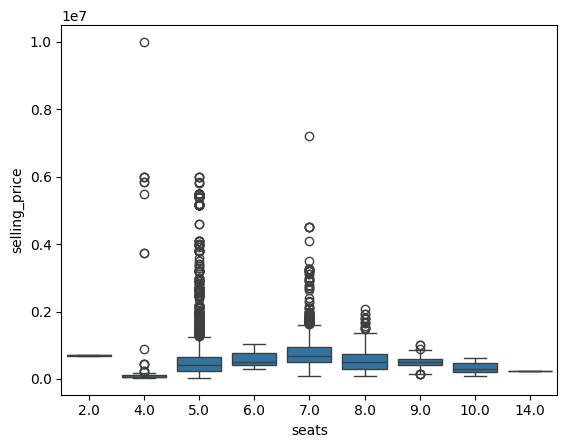

In [24]:
sns.boxplot(x = df['seats'], y = df['selling_price'])
plt.ylabel("selling_price")
plt.xlabel("seats")

**Scatter Plot**

The "year" column and the "transmission" colum are used in a scatter plot to see the relation between their values and the selling price of the cars.

<Axes: xlabel='year', ylabel='selling_price'>

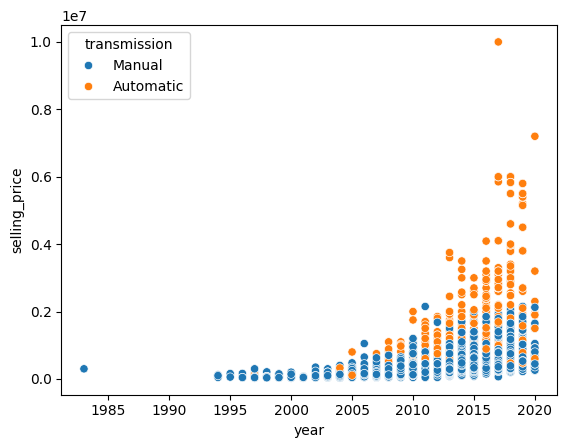

In [25]:
sns.scatterplot(x = df.year, y = df.selling_price, hue = df.transmission)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


**Correlation Matrix**

The correlation matrix shows us how each of the features related to one another and most importantly, how they relate to our label; the selling price of the cars.

In [27]:
#correlateion matrix
#label encoding
le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

In [28]:
#check to see what numbers are mapped to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [29]:
#save the names and get the mapping of the classes
brand_mapping = dict(zip(le.classes_, range(len(le.classes_))))
brand_mapping

{'Ambassador': 0,
 'Ashok': 1,
 'Audi': 2,
 'BMW': 3,
 'Chevrolet': 4,
 'Daewoo': 5,
 'Datsun': 6,
 'Fiat': 7,
 'Force': 8,
 'Ford': 9,
 'Honda': 10,
 'Hyundai': 11,
 'Isuzu': 12,
 'Jaguar': 13,
 'Jeep': 14,
 'Kia': 15,
 'Land': 16,
 'Lexus': 17,
 'MG': 18,
 'Mahindra': 19,
 'Maruti': 20,
 'Mercedes-Benz': 21,
 'Mitsubishi': 22,
 'Nissan': 23,
 'Opel': 24,
 'Peugeot': 25,
 'Renault': 26,
 'Skoda': 27,
 'Tata': 28,
 'Toyota': 29,
 'Volkswagen': 30,
 'Volvo': 31}

In [30]:
df['fuel'] = le.fit_transform(df['fuel'])

df['fuel'].unique()

array([0, 1])

In [31]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [32]:
df['seller_type'] = le.fit_transform(df['seller_type'])

df['seller_type'].unique()

array([1, 0, 2])

In [33]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [34]:
df['transmission'] = le.fit_transform(df['transmission'])

df['transmission'].unique()

array([1, 0])

In [35]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [36]:
# Apply log transformation to the 'selling_price' column

df['selling_price'] = np.log(df['selling_price'])

In [37]:
df['selling_price']

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int32  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int32  
 5   seller_type    8028 non-null   int32  
 6   transmission   8028 non-null   int32  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 689.9 KB


<Axes: >

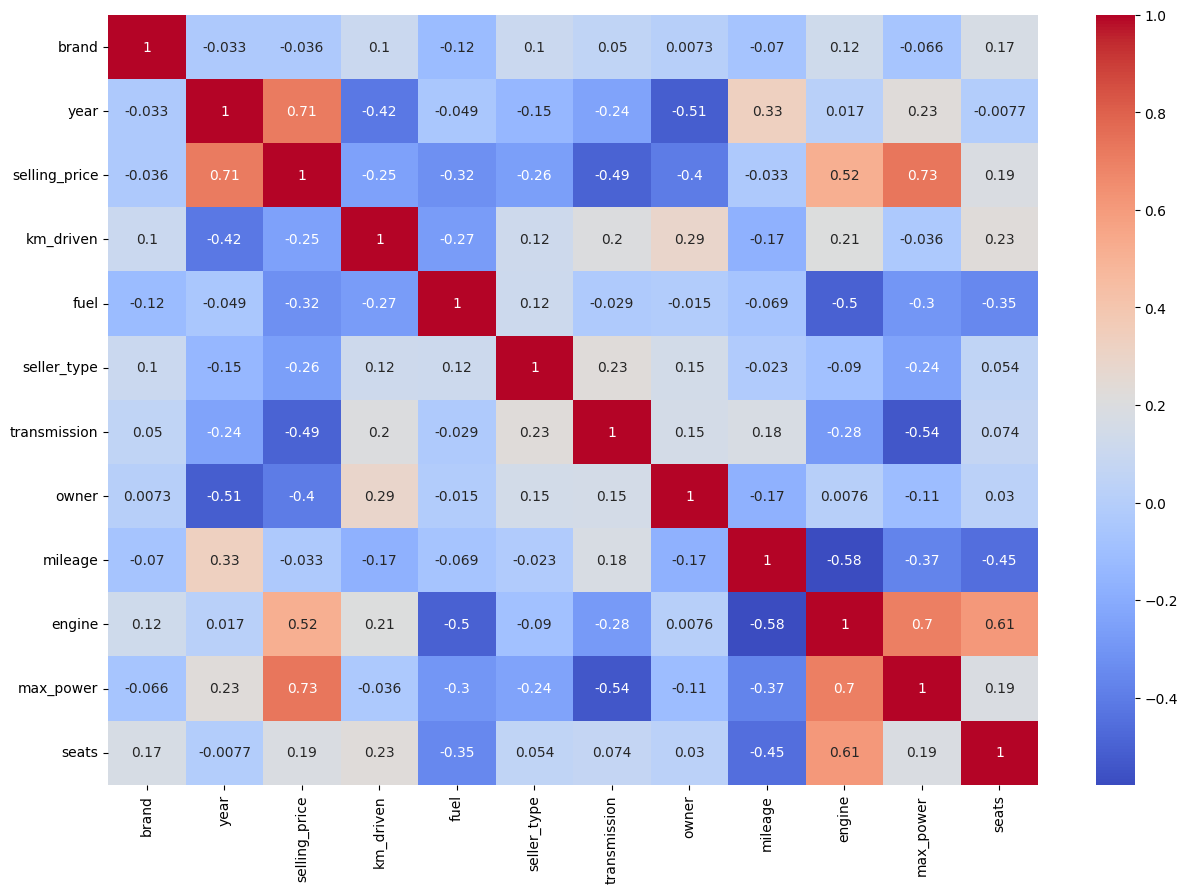

In [39]:
df_num = df.select_dtypes(include='number')
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')

The features year, km_driven, and max power are strong candidates for predicting the selling price of cars. The year is significant because newer cars generally have higher resale values. Km_driven reflects the car's usage, with more mileage often resulting in a lower price. Max power is a good choice over engine power due to their high correlation, with max power still capturing the car's performance. These features are likely to provide a solid foundation for building a reliable model.

**Predictive Power Score**

The predictive power score library is used to more accurately see the correlation results and confirm our assumptions of the relation of the features to the label.

<Axes: xlabel='x', ylabel='y'>

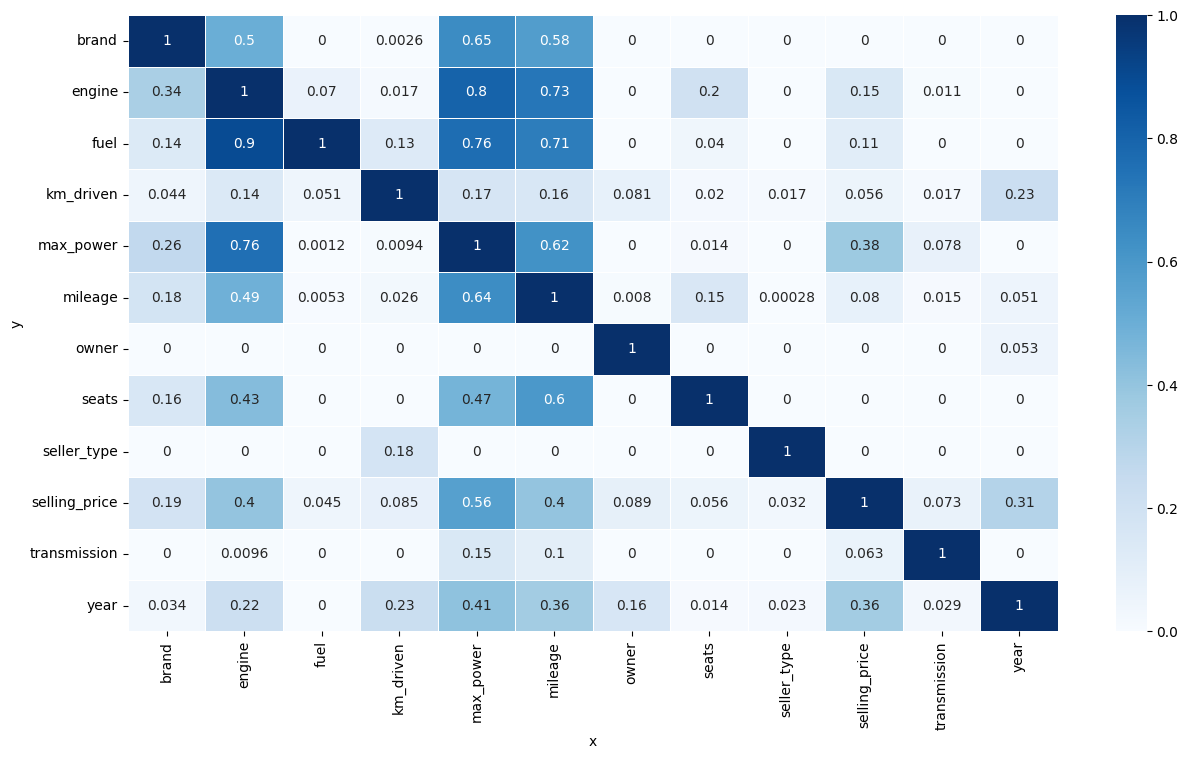

In [40]:
#predictive power score

# Copy the data frame to avoid manipulating the original data frame
dfcopy = df.copy()


matrix_df = pps.matrix(dfcopy)[['x','y','ppscore']].pivot(columns = 'x', index = 'y', values = 'ppscore')

#plot
plt.figure(figsize=(15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidth = 0.5, annot = True)

### 3. Feature Engineering
The step of feature engineering is skipped considering most of the columns do not require to be merged or to produce derivations.

### 4. Feature Selection

The selected features for predicting the selling price of cars are year, km_driven, and max power. The year of the car is a crucial factor, as newer cars typically have higher resale values. Km_driven indicates the car's usage, with higher mileage often leading to a lower selling price. Max power is chosen over engine power due to their high correlation, with max power still effectively representing the car's performance. These features are expected to provide a strong basis for modeling the car's selling price.

In [41]:
#feature selection

X = df[['year', 'km_driven','max_power']]
y = df['selling_price']

In [42]:
X.shape , y.shape

((8028, 3), (8028,))

In [43]:
type(X) , type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [44]:
#shape of (m, n)
X = df[['year','km_driven','max_power']]
assert len(X.shape) == 2  #unit test

#shape of (m,)
y = df['selling_price']  
assert len(y.shape) == 1

**Train Test Split**

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [46]:
X_train.shape , X_test.shape

((6422, 3), (1606, 3))

In [47]:
y_train.shape , y_test.shape

((6422,), (1606,))

### 5. Preprocessing

In [48]:
#Preprocessing

#null value
X_train.isnull().sum()

year           0
km_driven      0
max_power    162
dtype: int64

In [49]:
y_train.isnull().sum()

0

In [50]:
X_test.isnull().sum()

year          0
km_driven     0
max_power    46
dtype: int64

In [51]:
y_test.isnull().sum()

0

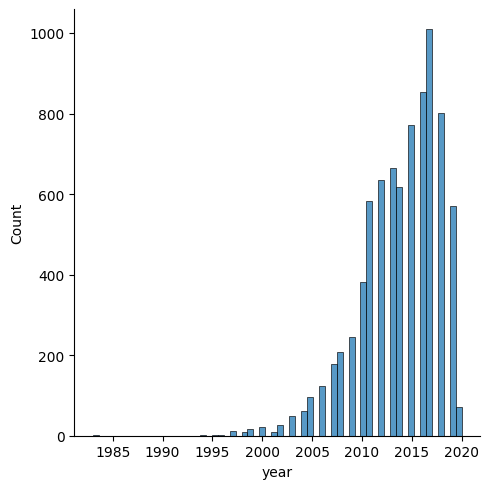

In [52]:
sns.displot(data=df, x='year')

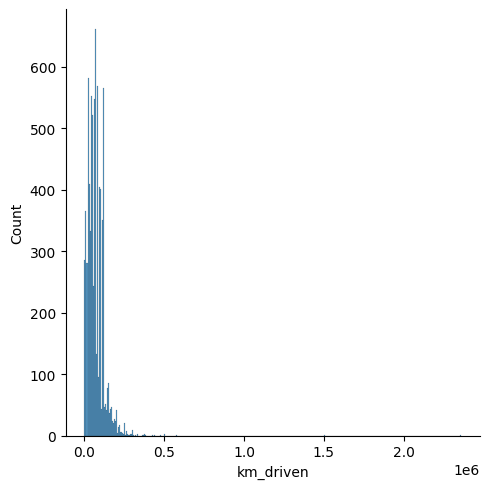

In [53]:
sns.displot(data=df, x='km_driven')

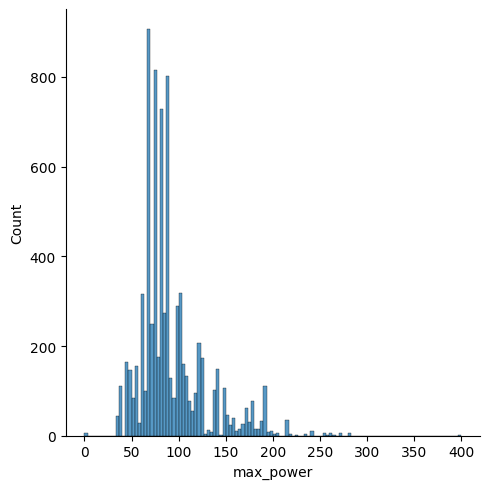

In [54]:
sns.displot(data=df, x='max_power')

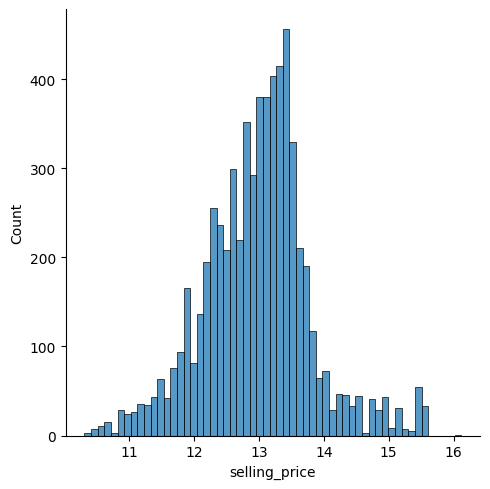

In [55]:
sns.displot(y_train)

In [56]:
# Filling the other columns
X_train['year'].fillna(X_train['year'].median(), inplace=True)
X_train['km_driven'].fillna(X_train['km_driven'].mean(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [57]:
#Test set
X_test['year'].fillna(X_train['year'].median(), inplace=True)
X_test['km_driven'].fillna(X_train['km_driven'].mean(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [58]:
# Doing the same for targets
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

In [59]:
# Checking values
X_train[['year', 'km_driven','max_power']].isna().sum()

year         0
km_driven    0
max_power    0
dtype: int64

In [60]:
y_train.isna().sum()

0

In [61]:
y_test.isna().sum()

0

**Checking outliers**

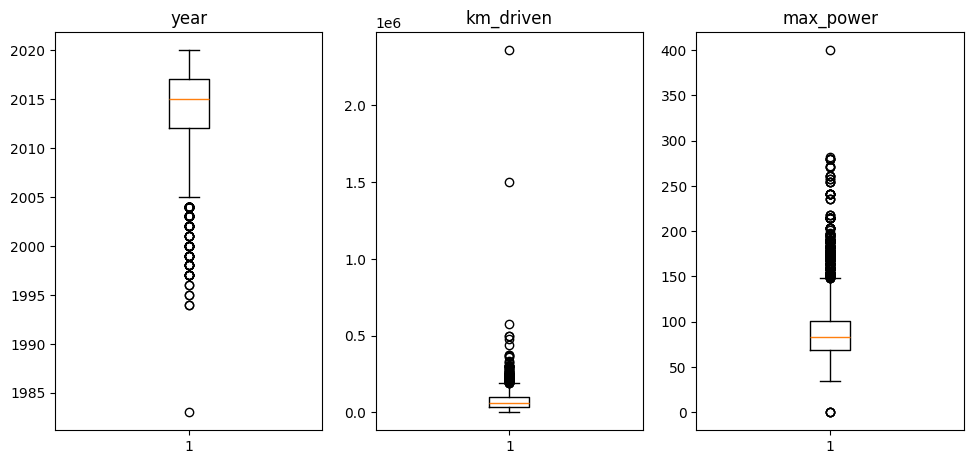

In [62]:
# Check outlier in numeric column (not category column)
# Create a dictionary of columns.
col_dict = {'year':1,'km_driven':2,'max_power':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,5,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [63]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+17*'*' + col + 17*'*'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [64]:
for col in X_train[['year','km_driven', 'max_power']].columns:
    outlier_count(col)


*****************year*****************

Number of outliers: 174
Percent of data that is outlier: 2.71%

*****************km_driven*****************

Number of outliers: 129
Percent of data that is outlier: 2.01%

*****************max_power*****************

Number of outliers: 477
Percent of data that is outlier: 7.43%


**Scaling**

In [65]:
#from sklearn.preprocessing import StandardScaler

# Feature scaling helps improve reach convergence faster
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test  = scaler.transform(X_test)

In [66]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


### 6. Modeling

In [67]:
#Modeling

#cross-validation
#define algorithms to compare

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

algorithms = [LinearRegression(), RandomForestRegressor(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor()]
algorithms_name = ['LinearRegression', 'RandomForestRegressor', 'SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor']


In [68]:
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse = []

kfold = KFold(n_splits = 5, shuffle = True)
for i,model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
    print(f"{algorithms_name[i]}: Score: {scores} ; Mean: {scores.mean()}")

LinearRegression: Score: [-0.11883058 -0.11544704 -0.11929055 -0.11089243 -0.11616344] ; Mean: -0.11612480864942054
RandomForestRegressor: Score: [-0.06912549 -0.0701271  -0.07356548 -0.0650349  -0.07288911] ; Mean: -0.07014841729169721
SVR: Score: [-0.62434356 -0.59484414 -0.59069748 -0.60143061 -0.57296989] ; Mean: -0.5968571353988171
KNeighborsRegressor: Score: [-0.21264539 -0.22535082 -0.24598737 -0.22434383 -0.22690879] ; Mean: -0.2270472423850242
DecisionTreeRegressor: Score: [-0.10893288 -0.10520041 -0.10036779 -0.10286618 -0.10828187] ; Mean: -0.105129826351236


**Grid search**

In [69]:


from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5,10,None], 'n_estimators': [5,6,7,8,9,10]}
rf = RandomForestRegressor(random_state=1)
grid = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    cv = kfold,
                    n_jobs = 1,
                    return_train_score = True,
                    refit = True,
                    scoring = 'neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 10}

In [71]:
best_mse = grid.best_score_

In [72]:
best_mse

-0.06788832202105477

### 7. Testing

In [73]:
#for testing
from sklearn.metrics import mean_squared_error

# Predict the test set
yhat = grid.predict(X_test)

# Calculate the mean square error
mean_squared_error(y_test, yhat)


0.07320457516780264

### 8. Analysis

**Algorithm way**

In [74]:
#analysis

rf = grid.best_estimator_

In [75]:
rf.feature_importances_

array([0.49624495, 0.0257788 , 0.47797626])

<BarContainer object of 3 artists>

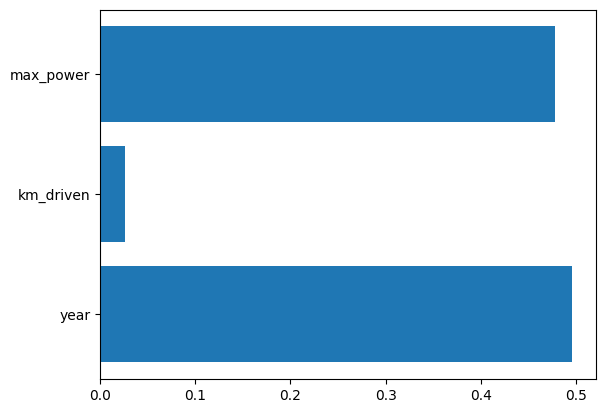

In [76]:
plt.barh(X.columns, rf.feature_importances_)

**Permutation way**

Text(0.5, 0, 'Random Forest Feature Importance')

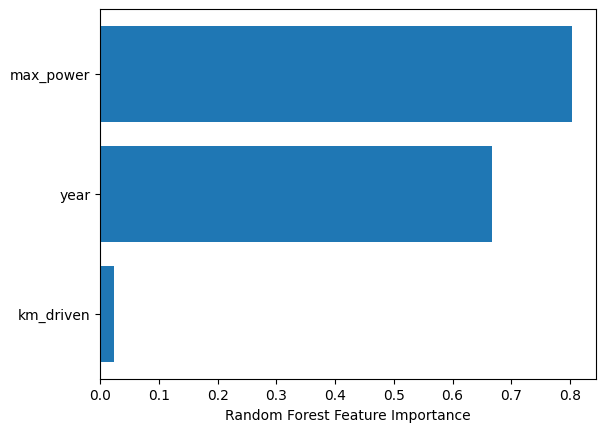

In [77]:
#permutation way

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

# Let's plot
sorted_index = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_index], perm_importance.importances_mean[sorted_index])
plt.xlabel("Random Forest Feature Importance")

In [78]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


**Shap way**

In [79]:
#Shap way

import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

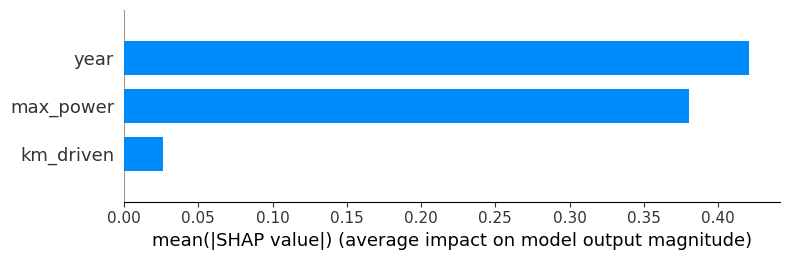

In [80]:
#plot Shap
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

### 9. Inference

In [81]:
#Inference
import pickle

# save the model to disk
filename = 'car_selling_price.model'
pickle.dump(grid, open(filename, 'wb'))

In [82]:
# Load the model

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [83]:
print(type(loaded_model))

<class 'sklearn.model_selection._search.GridSearchCV'>


In [84]:
df[['year','km_driven','max_power','selling_price']].loc[500]

year              2016.000000
km_driven        34000.000000
max_power           91.100000
selling_price       13.399995
Name: 500, dtype: float64

In [85]:
# The real selling price of this sample
np.exp(df['selling_price'].loc[500])

660000.0000000003

In [86]:
# Create array of sample data
#['engine', 'mileage','max_power']
sample = np.array([[2016, 34000, 91.1]])

In [87]:
# Predict the selling price
predicted_price = loaded_model.predict(sample)
predicted_price = np.exp(predicted_price)
predicted_price

array([623016.14712794])

### Assignment Report
**Features**

The selected features for predicting the selling price of cars are **year**, **km_driven**, and **max power**. The year of the car is a crucial factor, as newer cars typically have higher resale values. Km_driven indicates the car's usage, with higher mileage often leading to a lower selling price. Max power is chosen over engine power due to their high correlation, with max power still effectively representing the car's performance. These features are expected to provide a strong basis for modeling the car's selling price.

The Random Forest Regressor was selected because it outperformed other algorithms during cross-validation. While the Decision Tree Regressor had similar results, it fell slightly short in comparison. Random Forest's strength lies in its ability to model both linear and non-linear relationships, unlike Linear Regression and SVR, which rely on linear assumptions. Its robustness to outliers, particularly with the 'engine' feature having about 15% outliers, also played a key role. Additionally, as an ensemble method, Random Forest's combination of multiple decision trees likely contributed to its superior performance.

The Random Forest model's predictions are effective with the selected features—**year**, **km_driven**, and **max power**—all playing key roles in determining the selling price of cars. Among these, **year** and **km_driven** contribute significantly, reflecting the car's age and usage, while **max power** stands out as a crucial indicator of the vehicle's performance. The model effectively captures these aspects, providing reliable predictions for the selling price. The final model includes the necessary components, such as the scaler and imputation values, to handle any missing input fields.